<a href="https://colab.research.google.com/github/Mobashera-Alam/CS-5783-MachineLearning/blob/main/Assignment4/Problem3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [117]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [148]:
filename = "/content/drive/My Drive/ML/Assignment4/Asssignment4_Data.xlsx"
train = pd.read_excel(filename, sheet_name= "Train")
test = pd.read_excel(filename, sheet_name="Test")
#test

In [149]:
x_train = train.drop(["House ID", "Construction type"], axis=1).to_numpy()
x_test=test.drop(["House ID", "Construction type"], axis=1).to_numpy()
#print(x_test)

In [150]:
train['Class']=train['Construction type'].map({'Apartment':0,'Condo':1,'House':2}) #label each class as numeric for training and test data
test['Class']=test['Construction type'].map({'Apartment':0,'Condo':1,'House':2})

y_train=train['Class'].to_numpy() #selecting labels

y_test=test['Class'].to_numpy()
#print(y_train)

In [151]:
#Data Standardizaiton
mu = np.mean(x_train,axis=0)
std = np.std(x_train,axis=0)
norm_x_train = (x_train-mu)/std
norm_x_test = (x_test-mu)/std
#print(norm_x_test)
print(y_test)

[0 2 2 0 0]


In [152]:
class KNearestNeighbor():
  def __init__(self,k):
    self.k=k
  def train(self, x,y):
    self.x_train = norm_x_train
    self.y_train = y_train
  def predict(self,x_test):
    distances = self.eucleadian_distance(x_test)
    return self.predict_labels(distances)

  def eucleadian_distance(self, x_test):
    num_test = x_test.shape[0]
    num_train = self.x_train.shape[0]
    distances = np.zeros((num_test,num_train))
    for i in range(num_test):
      for j in range(num_train):
        distances[i,j] = np.sqrt(np.sum((x_test[i,:]-self.x_train[j,:])**2))    # Euclidean distance
    return distances 

  def predict_labels(self, distances):
    num_test = distances.shape[0]
    y_pred = np.zeros(num_test)

    for i in range(num_test):
      y_indices = np.argsort(distances[i,:])
      k_close_class = self.y_train[y_indices[:self.k]].astype(int)
      y_pred[i] = np.argmax(np.bincount(k_close_class))
    return y_pred

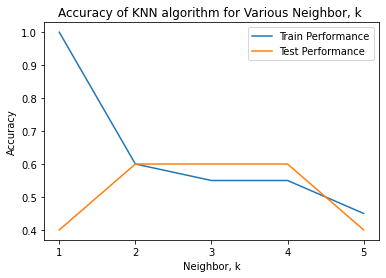

In [153]:
x = np.array(norm_x_train)
y = np.array(y_train)
y_t = np.array(y_test)
x_t = np.array(norm_x_test)
out_train = []
out_test = []
k_num = [1,2,3,4,5]
for i in range(len(k_num)):
  KNN = KNearestNeighbor(k=k_num[i])
  KNN.train(x,y)
  y_pred_train = KNN.predict(x)
  acc_t = np.sum(y_pred_train==y)/y.shape[0]
  out_train.insert(i,acc_t)
  y_pred_test = KNN.predict(x_t)
  acc_te = np.sum(y_pred_test==y_t)/y_t.shape[0]
  out_test.insert(i,acc_te)
plt.plot(k_num,out_train,label = 'Train Performance')
plt.plot(k_num,out_test, label = 'Test Performance')
plt.xticks(range(1,6,1))
plt.xlabel('Neighbor, k')
plt.ylabel('Accuracy')
plt.title('Accuracy of KNN algorithm for Various Neighbor, k ')
plt.legend()



In [158]:
#Best Performance
x = np.array(norm_x_train)
y = np.array(y_train)
y_t = np.array(y_test)
x_t = np.array(norm_x_test)

KNN1 = KNearestNeighbor(k=2)
KNN1.train(x,y)
#print(x_t)
print(KNN1.predict(x_t))
y_pred_test_b = KNN1.predict(x_t)

y_b = y_pred_test_b.astype(int)
print('For k=2:', test['Construction type'][y_b])


[0. 0. 0. 0. 0.]
For k=2: 0    Apartment
0    Apartment
0    Apartment
0    Apartment
0    Apartment
Name: Construction type, dtype: object


variance reduces with the increase k=1 to 2 increase bias but decrease variance. Bias remains same as 2 to 4 and then decreases from 4 to 5. So, variance increases 4 to 5.   